***Hi there! In this EDA projects we will be performing zomato-bangalore-restaurants data analysis which is present on kaggle platform itself, we will be using multiple libraries in this project which will help us in analysing and visualizing our dataset. we will investigate a dataset that carries approximate facts about the restaurant chains in Bangalore that also run on Zomato. Hence by studying the Zomato dataset, you can get deeper insights into some of the influencing factors that improve the functioning of a restaurant in Bangalore.***

**Implementation**

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
#plt.style.use('dark_background')
plt.style.use('ggplot') #it gives style to the visuals

**Reading CSV file**

In [2]:
df=pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape  #51717 rows and 17 columns

(51717, 17)

In [4]:
df.columns  #list of columns in our table

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

**There are fews columns which i feel is not necessary for me,so let's drop them**

In [5]:
df=df.drop(['url','address','phone','menu_item','dish_liked','reviews_list'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [6]:
df.info()  #provides information about my dataset
          #we can see that in rate,location,rest_type,cuisines ,approx_cost column we have some null values bec total 51717 should be there and here its less

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


**Dropping Duplicates**-dropping duplicate values if any

In [7]:
df.drop_duplicates(inplace=True)
df.shape  #before we have 51717 rows now we have 51609 rows after dropping duplicates

(51609, 11)

**Cleaning Rate Column**

In [8]:
df['rate'].unique() #we can see that along with float value we also have strings like 'new','nan',-.its of string type here

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

**Removing "NEW","-" and "/5" from rate column**

In [9]:
def ratehandle(value):
    if(value == 'NEW' or value == '-'):
        return np.nan  #replace new,- by null value
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

In [10]:
df['rate'] = df['rate'].apply(ratehandle)
df['rate']  #new,- ,/5 is removed now we need to handle null value 

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51609, dtype: float64

In [11]:
df.rate.isnull().sum() #we have 10019 null values

10019

**Filling Null values in rate column with mean**

In [12]:
df['rate'].fillna(df['rate'].mean(),inplace=True)
df['rate'].isnull().sum()

0

In [13]:
df['rate']

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
51712    3.600000
51713    3.700142
51714    3.700142
51715    4.300000
51716    3.400000
Name: rate, Length: 51609, dtype: float64

In [14]:
df.info()  #now we need to handle location n rest columns which have null.since there are not much null values i can drop them

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


**Dropping null values**

In [15]:
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51042 non-null  object 
 1   online_order                 51042 non-null  object 
 2   book_table                   51042 non-null  object 
 3   rate                         51042 non-null  float64
 4   votes                        51042 non-null  int64  
 5   location                     51042 non-null  object 
 6   rest_type                    51042 non-null  object 
 7   cuisines                     51042 non-null  object 
 8   approx_cost(for two people)  51042 non-null  object 
 9   listed_in(type)              51042 non-null  object 
 10  listed_in(city)              51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


**Renaming few column_names** bec it's too lengthy

In [17]:
df.rename(columns={
    'approx_cost(for two people)' : 'Cost2plates',
    'listed_in(type)' : 'Type'
},inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [18]:
df['location'].unique() #let's check how many unique values are there in location column

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [19]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

**listed_in(city) and location both are there so let's keep only one and drop the other one**

In [20]:
df = df.drop(['listed_in(city)'],axis = 1) #we dropped listed_in(city)

In [21]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [22]:
df['Cost2plates'].unique() #we have , in values eg:1,650 which is restricting it to be int/float so the dtype is string

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

**Removing , from Cost2plates column**

In [23]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value) #if , is not present then just return float of that value
    
df['Cost2plates'] = df['Cost2plates'].apply(handlecomma)
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [24]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


**Cleaning rest_type column**

In [25]:
df['rest_type'].value_counts() #we can see that Sweet Shop, Dessert Parlor have only 1 restaurant so we can make one cluster of those which have few restaurants and name it as others

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [26]:
rest_types = df['rest_type'].value_counts(ascending = False)
rest_types  #in desc order it will be displayed (quick Bites have 19010 restaurants,etc)

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [27]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000 #in this var we are storing rest_types which have less than 1000 restaurants

rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

**Making rest_types_less_than1000 in frequency as others(rename)**

In [28]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
        
df['rest_type'] = df['rest_type'].apply(handle_rest_type) #rest_type is colname
df['rest_type'].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

In [29]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


**Cleaning location column**

In [30]:
df['location'].value_counts() #it says BTM have 5056 restaurant

location
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

we can also make a cluster of those restaurants which have less no of restaurants in a particular location

In [31]:
location = df['location'].value_counts(ascending  = False)

location_lessthan300 = location[location<300] 
#we created a var(location_lessthan300) which will store all those location having less than 300 restaurants
#it's up to us we can take 300,900 any no (max is 5000 as mentioned above)

**Making location_lessthan300 in frequency as others**

In [32]:
def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
        
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

In [33]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


**we need to analyse each column one by one & that's what we are doing.let's analyse rest columns which we haven't looked**

**Cleaning cuisines column**

In [34]:
df['cuisines'].value_counts()

cuisines
North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: count, Length: 2704, dtype: int64

In [35]:
cuisines = df['cuisines'].value_counts(ascending  = False)


cuisines_lessthan100 = cuisines[cuisines<100]



def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

In [36]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [37]:
df['Type'].value_counts() #Type col have less no of unique values & good amt of restaurants so we are not doing any changes here

Type
Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: count, dtype: int64

**We have cleaned are data, now let's jump to visualization**

In [38]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


1. **Count Plot of Various Locations**

Text(0.5, 0, 'Location')

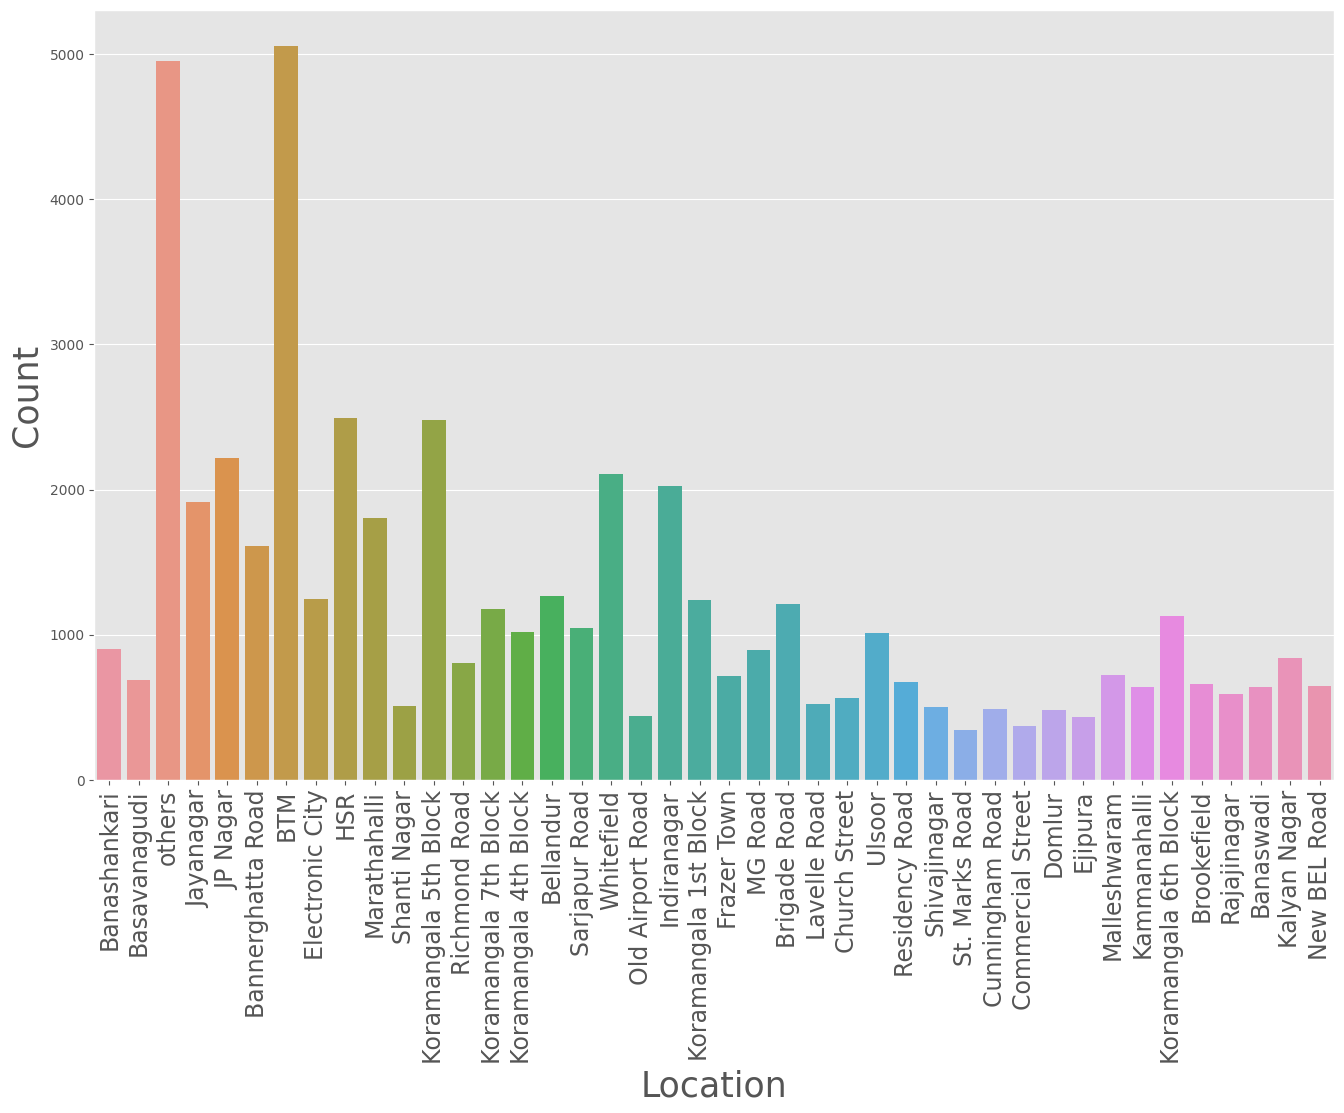

In [39]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x='location',data=df)
plt.xticks(rotation=90,fontsize=17)
plt.ylabel('Count',fontsize=25) 
plt.xlabel('Location',fontsize=25)

**we can see that max no of restaurants are present in BTM,so if i want to open a restaurant i should definately not open in BTM bec is have so many restaurant, i can target those areas which have less no of restaurants like at Koramangala 8th Block so that my business can grow**

2. **Visualizing Online Order**  - to see how many restaurants are having online facility or not having online facility

<Axes: xlabel='online_order', ylabel='count'>

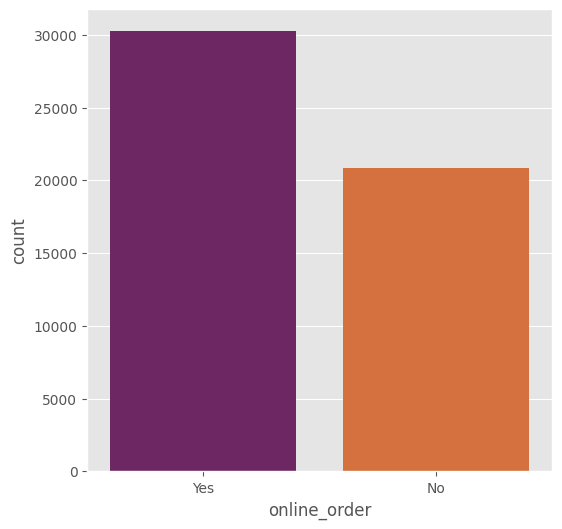

In [40]:
plt.figure(figsize = (6,6))
sns.countplot(x='online_order',data=df,palette = 'inferno')

**so i can say that most of the restaurants are having online facilities available**

In [41]:
#How many restaurants in Bangalore take online orders?(can also do this way you will get result)


#print(df['online_order'].value_counts())
#plt.figure(figsize=(5,6))
#df['online_order'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.1f%%', textprops={'fontsize': 10})
#plt.title('% of restaurants that take online orders',size=10)
#plt.xlabel('',size=10)
#plt.ylabel('',size=10)
#plt.legend(loc=2, prop={'size': 10})

#It is evident from the above graph that in nearly 59.2% of restaurants, an online ordering facility is available.

3. **Visualizing Book Table** - to see if restaurants have book table facility or not

<Axes: xlabel='book_table', ylabel='count'>

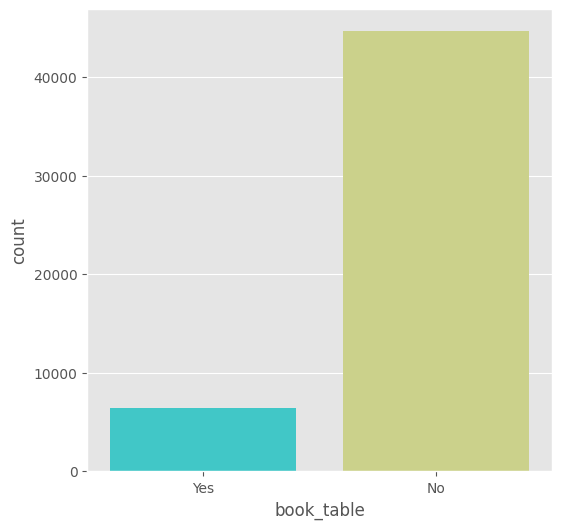

In [42]:
plt.figure(figsize = (6,6))
sns.countplot(x='book_table',data=df, palette = 'rainbow')

**so i can say that most of the restaurants are not having book table facility**

In [52]:
#What percentage of restaurants offer table booking facilities?(if u want to see % wise)

#print(df['book_table'].value_counts())
#plt.figure(figsize=(30,10))
#df['book_table'].value_counts().plot(kind='pie',colors=['plum','mediumorchid'],autopct='%1.1f%%', textprops={'fontsize': 15})
#plt.title('% of restaurants that provide table booking facility',size=20)
#plt.xlabel('',size=15)
#plt.ylabel('',size=15)
#plt.legend(loc=2, prop={'size': 15})

#The pie chart shows that approximately 85% of the restaurants in Bangalore do not have a table booking facility through Zomato.

4. **Visualizing Online Order vs Rate** - if a restaraunt is having online facility & is the rate higher lets check

<Axes: xlabel='online_order', ylabel='rate'>

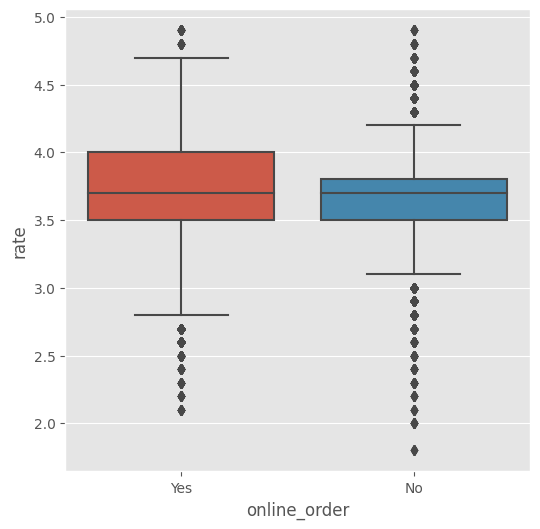

In [44]:
plt.figure(figsize = (6,6))
sns.boxplot(x ='online_order',y='rate',data=df)

**so the restaurants which are having online order facility there max rate (i.e, rating)is higher (around 4.8)which is good than the restaurants which are not providing online order facility(4.2 or 4.3)**

5. **Visualizing Book Table vs Rate**

<Axes: xlabel='book_table', ylabel='rate'>

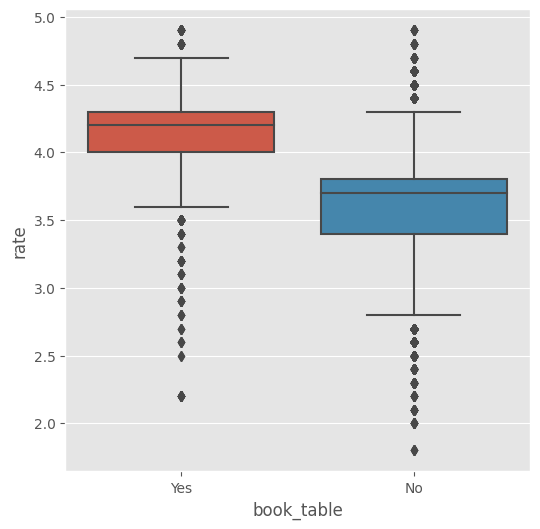

In [45]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

**so the restaurants which are having the book table facility there avg rating is higher(middle line inside the box is avg/mean) than the restarant not having book table facility.So, if i open a restaurant i should keep in mind that i should provide a book table facility bec there avg rating is higher**

6. **Visualizing Online Order Facility, Location Wise** - we are visualizing online order facility location wise so that if i want to open a restaurant in bangalore & i if i want to open a online order facility restaurant where can i open(so where this online facility is not available i need to open there)

In [46]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')  #the col which we grouped we are making csv file of it
df1 = pd.read_csv('location_online.csv') #reading that csv file
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1 #then we maked a pivot table where location is our index and we have a column of online order which will say that we have online order facility or not

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

<Axes: xlabel='location'>

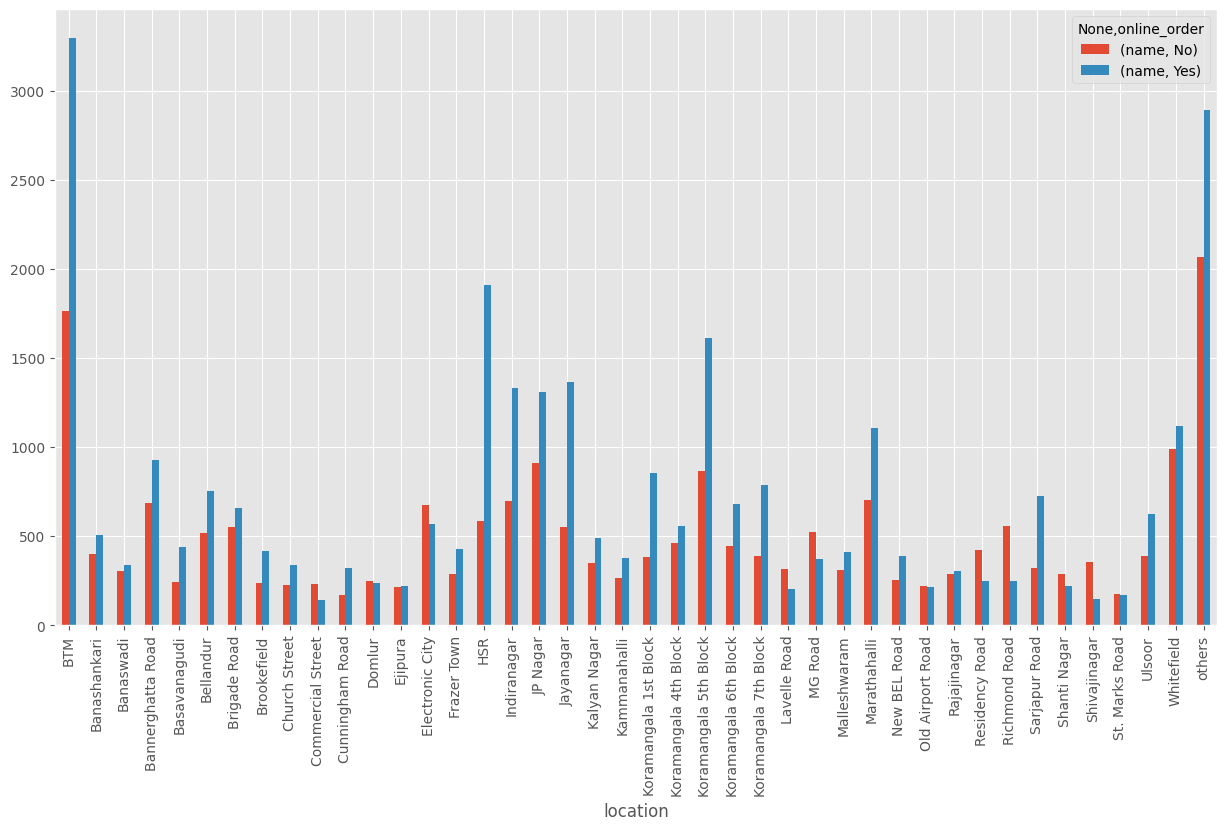

In [47]:
df1.plot(kind = 'bar', figsize = (15,8))

**from this plot i'm able to visualize that in BTM already there are many restaurants that provide online order facility(see the blue line is high and you have labelling for which color is for what u can refer that) but in Lavelle Road the blue line is smaller than red line which means most restaurants are those which do not provide online order facility so if i open here i can grow**

7. **Visualizing Book Table Facility, Location Wise**

In [48]:
df2 = df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

**so from the pivot table we can see that in BTM there are 4889 restaurants which don't provide book table facility and 167 restaurants provide book table facility in BTM etc.**

<Axes: xlabel='location'>

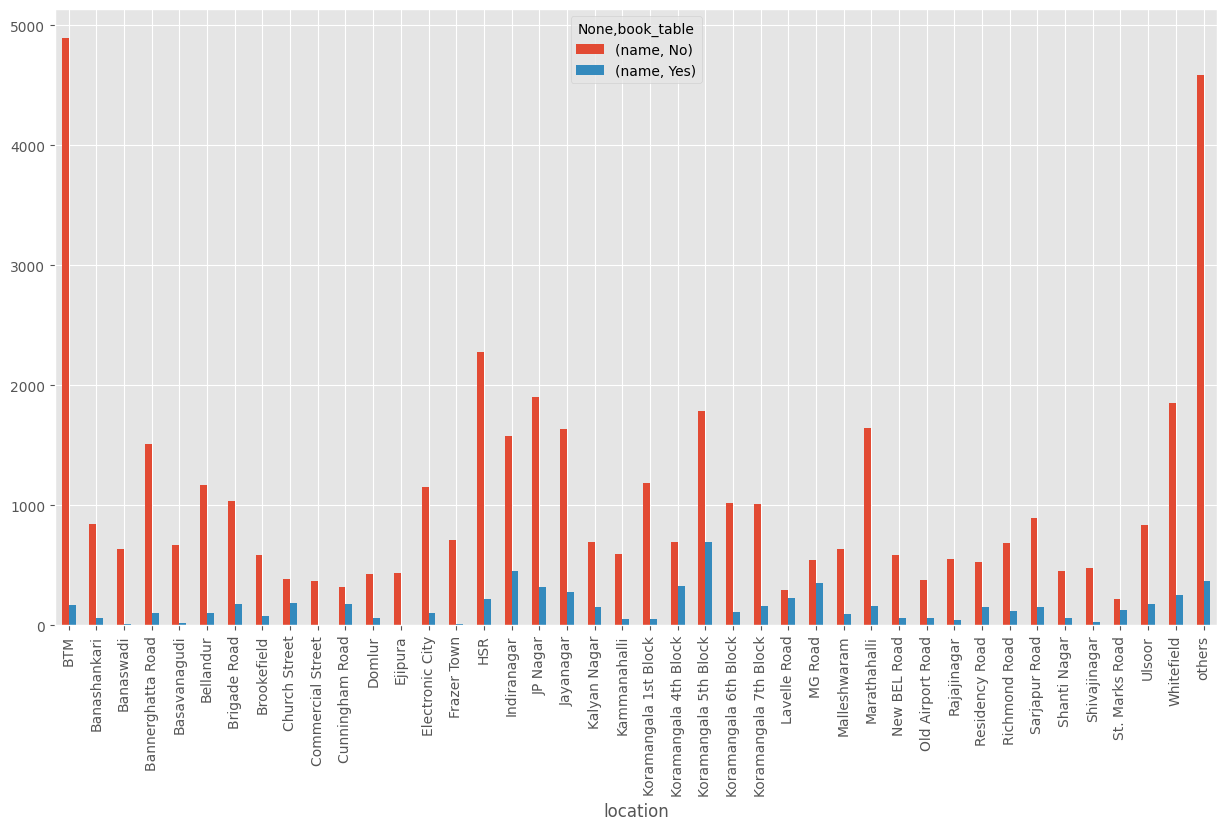

In [49]:
df2.plot(kind = 'bar', figsize = (15,8))  #bar plot

**i can say that in BTM there are many restaurants which do not provide book table facility(red do not provide book table facility,blue provides according to the value u can make out or through label),so if i want to open a restaurant with book table facility i can open in BTM but BTM already have so many restaurants so its not a good option to open a new restaurants there.so, i can choose HSR or any other**

In [50]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


8. **What is the average price for two people based on the type of service?**

            rest_type  Cost2plates
6         Quick Bites   317.457128
5      Dessert Parlor   332.488849
0              Bakery   370.377193
7  Takeaway, Delivery   392.159363
4            Delivery   432.928904
1                Cafe   620.165671
2       Casual Dining   790.539354
8              others   828.938132
3  Casual Dining, Bar  1249.690265


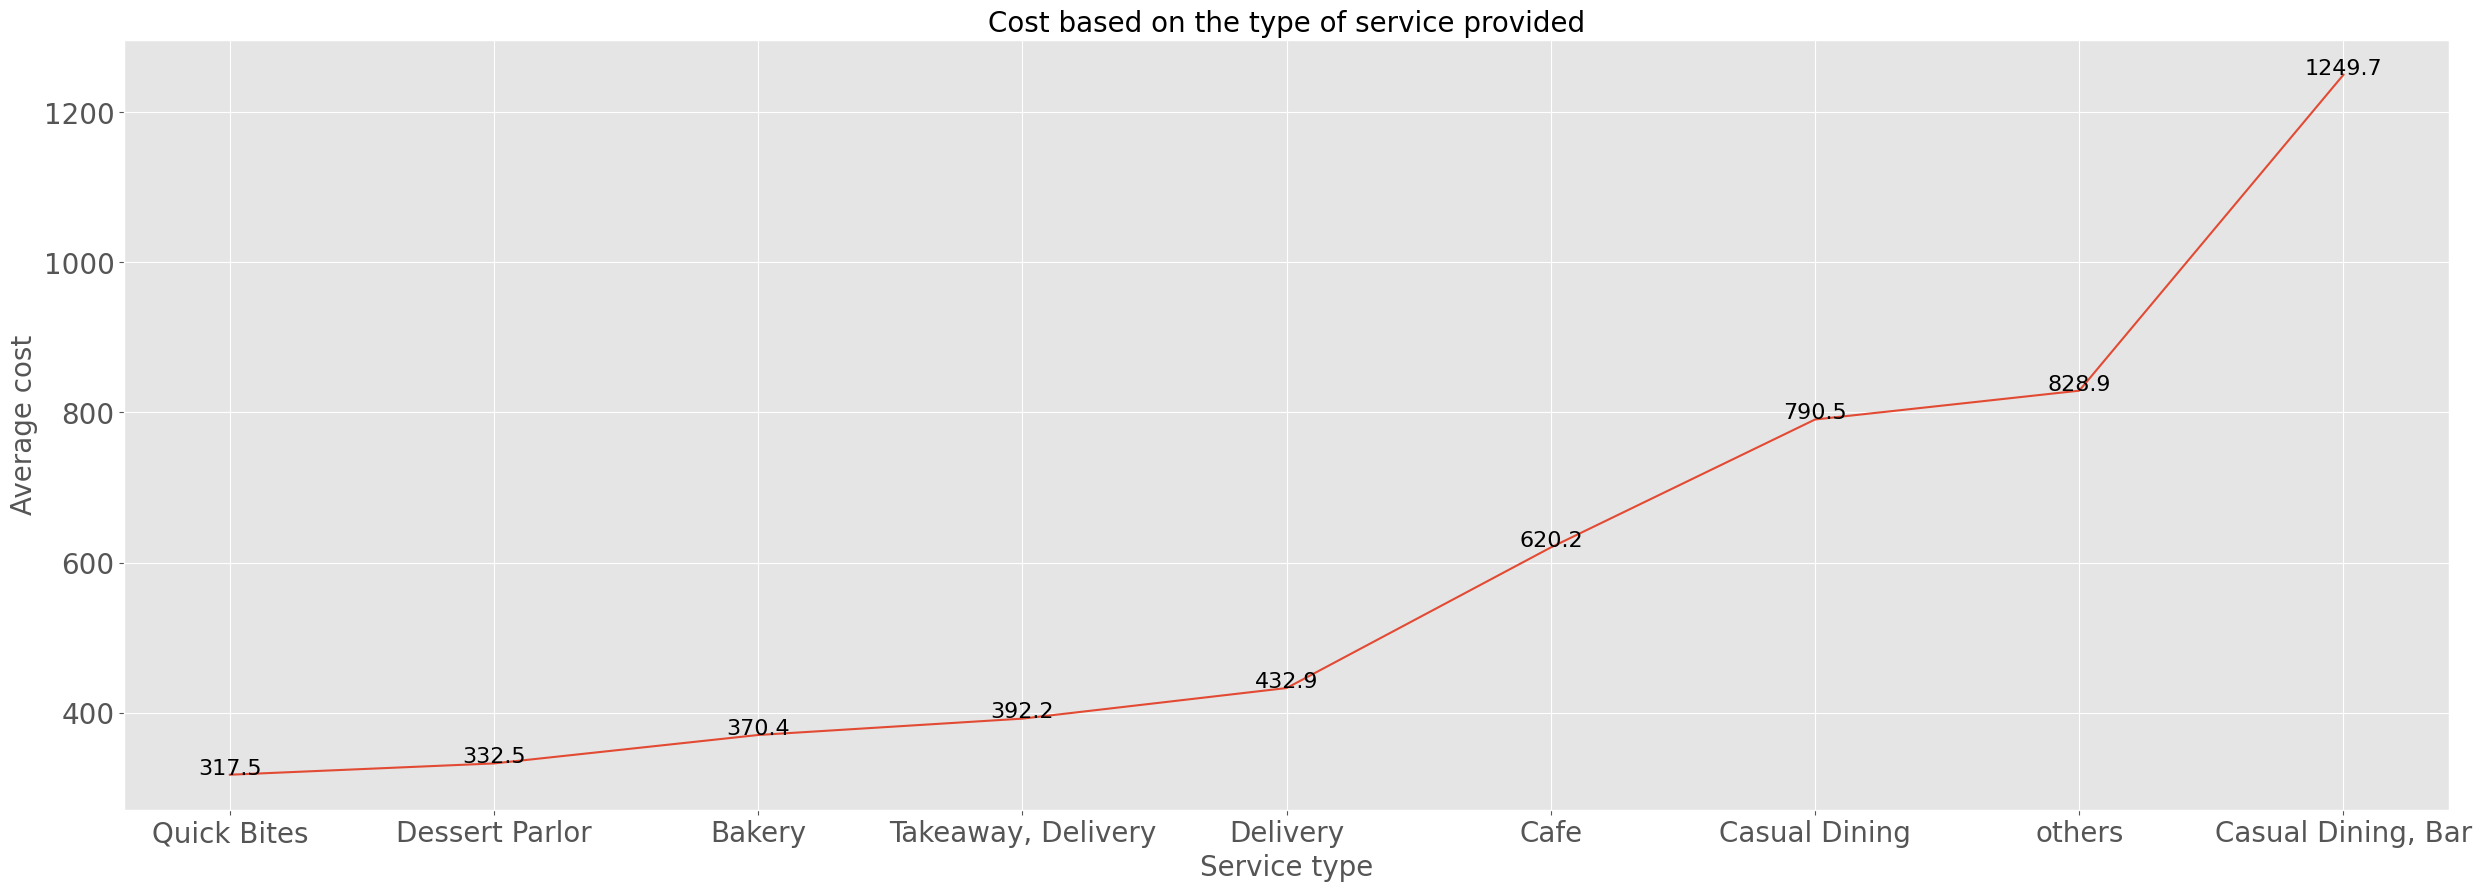

In [51]:
d=df.groupby('rest_type')['Cost2plates'].mean().reset_index().sort_values(by='Cost2plates')
print(d)
plt.figure(figsize=(30,10))
plt.plot(d['rest_type'],d['Cost2plates'])
plt.xlabel('Service type',size=20)
plt.ylabel('Average cost',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Cost based on the type of service provided',size=20)
for i,e in enumerate(d.Cost2plates):
    plt.text(i,e+1,round(e,1),fontsize=16,horizontalalignment='center')
plt.show()

**According to the line graph above, while Quick Bites were the least expensive type of food, restaurants that served Casual Dining,Bars cost around Rs.1249.7 for two people.**

**Conclusion**

**Here, we performed exploratory data analysis on the Zomato Bangalore Restaurants dataset and looked into the most influencing factors that led to a restaurant’s successful running in the city. The code provided here can be easily understood and used to implement EDA on other similar datasets.**

**Key Takeaways:**

* We can say that max no of restaurants are present in BTM .
* Most of the restaurants are having online facilities available and they also have good(max) number of ratings.
* Most of the restaurants are not having book table facility.
* Quick Bites were the least expensive type of food, restaurants that served Casual Dining,Bars cost around Rs.1249.7 for two people.